# Marcin Wilk PD6

In [70]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA


In [71]:
O_F = fetch_olivetti_faces()

Narysujemy kilka pierwszych obrazków

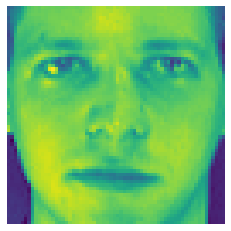

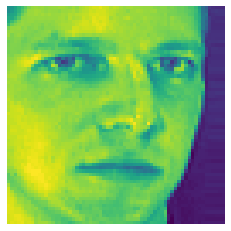

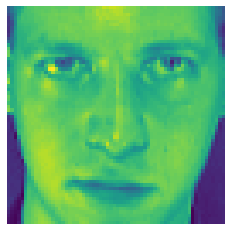

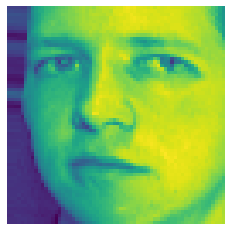

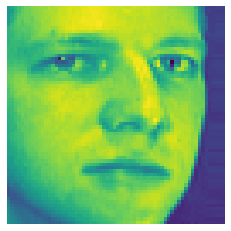

In [72]:
for i in range(5):
    plt.imshow((O_F['images'])[i])
    plt.axis('off')
    plt.show()


Wczytujemy obrazy zapisane wierszami.

In [73]:
X = O_F['data']
X.shape

(400, 4096)

In [74]:
pca = PCA(n_components=400)
pca.fit(X)

PCA(n_components=400)

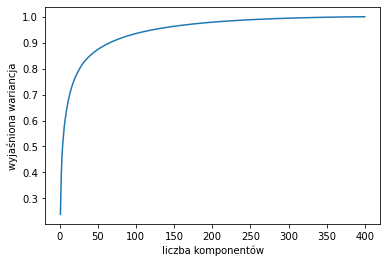

In [75]:
plt.plot(range(1,401),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("liczba komponentów")
plt.ylabel("wyjaśniona wariancja")
plt.show()

Widzimy, że 100 składowych tłumaczy ponad 90% wariancji, dlatego wybierzemy właśnie tyle.

In [76]:
pca = PCA(n_components=100)
pca.fit(X)
X_PCA = pca.transform(X)

In [77]:
X_PCA.shape

(400, 100)

Policzymy teraz stopień kompresji.

In [78]:
CR=X.shape[0]*X.shape[1]/X_PCA.shape[0]/X_PCA.shape[1]
CR

40.96

Spróbujemy teraz zrobić transformację odwrotną i zrekonstruować obrazy.

In [79]:
X_inverse = pca.inverse_transform(X_PCA)
X_inverse.shape

(400, 4096)

Narysujemy dla porównania pierwszy obraz bez przekształceń oraz po obu transformacjach.

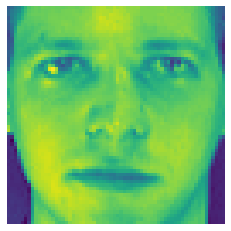

In [80]:
plt.imshow(X[0].reshape(64,64))
plt.axis('off')
plt.show()

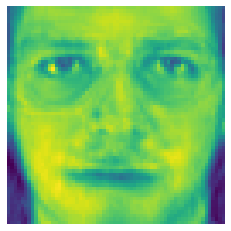

In [81]:
plt.imshow(X_inverse[0].reshape(64,64))
plt.axis('off')
plt.show()

Twarz została zrekonstruowana w całkiem niezły sposób, da się rozpoznać, że to ta sama osoba. Jedyną różnicą są wyraźne obwódki wokół oczu, które wyglądają jak okulary/wory pod oczami.

Policzymy błąd średniokwadratowy naszej transformacji dla każdego obrazu.

In [82]:
RMSE = np.apply_along_axis(lambda x:np.sqrt(np.mean((x)**2)),0,X-X_inverse)
RMSE

array([0.05141248, 0.03960848, 0.04509586, ..., 0.05542494, 0.04970445,
       0.05603564], dtype=float32)

In [83]:
np.mean(RMSE)

0.034290563

Odbijemy teraz te obrazy w poziomie.

In [84]:
X_flipped = np.apply_along_axis(np.flip,1,X)
X_flipped.shape

(400, 4096)

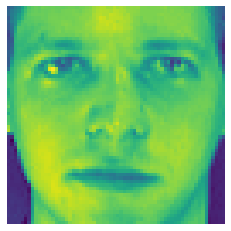

In [85]:
plt.imshow(X[0].reshape(64,64))
plt.axis('off')
plt.show()

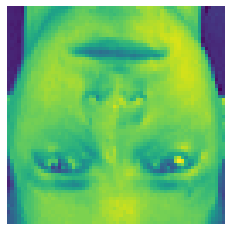

In [86]:
plt.imshow(X_flipped[0].reshape(64,64))
plt.axis('off')
plt.show()

Policzymy teraz transformację tych danych naszym PCA, a potem transformację odwrotną.

In [87]:
X_flipped_trans = pca.transform(X_flipped)
X_flipped_inverse = pca.inverse_transform(X_flipped_trans)

Porównamy teraz odbity obraz po transformacji z poprzednim.

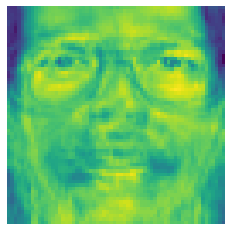

In [88]:
plt.imshow(X_flipped_inverse[0].reshape(64,64))
plt.axis('off')
plt.show()

Wyniki takich transformacji są dosyć zaskakujące, nasze PCA wyuczyło się tak, że zawraca nam obraz zupełnie innej twarzy, ale za to w "normalnej" pozycji. Nasza nowa osoba wygląda jakby miała brodę i okulary, pomimo tego, że poprzednia nie miała żadnej z tych rzeczy.

Policzymy teraz RMSE.

In [89]:
RMSE_flipped = np.apply_along_axis(lambda x:np.sqrt(np.mean((x)**2)),0,X_flipped-X_flipped_inverse)
RMSE_flipped

array([0.08988048, 0.08145806, 0.07978064, ..., 0.08007678, 0.08409069,
       0.09411326], dtype=float32)

In [90]:
np.mean(RMSE_flipped)

0.08946804

Widzimy, że nasze błęd zwiększyły się nawet dwu- lub trzykrotnie.